<a href="https://colab.research.google.com/github/suleymanVR/MachineLearning/blob/main/Week8_DecisionTree_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**test_size = 0.15,random_state = 42** olduğunda 

1.   DecisionTree ,Support Vector Machine ,Navie Bayes [Gauss] **accuracy degerleri yuksek olurken**

2.   Navie Bayes [Bernoulli]  ,Navie Bayes [Multinomial] **accuracy degerleri dusuyor**




**test_size = 0.30,random_state = 1** olduğunda

1.   Navie Bayes [Bernoulli] ,Navie Bayes [Multinomial] **accuracy degerleri daha yuksek olurken** 

2.   DecisionTree ,Support Vector Machine ,Navie Bayes [Gauss]  **accuracy degerleri dusuyor**

***DecisionTree için criterion="entropy", max_depth=3 olarak alındı.**











In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data = pd.read_csv("data.csv")

In [60]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

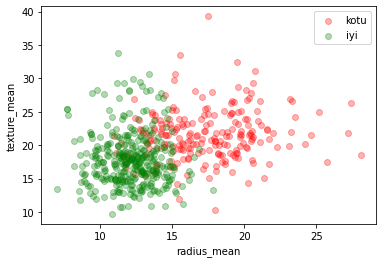

In [61]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()


In [62]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)


In [63]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=42)

# **DecisionTree**

In [65]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
# %% test
print("score: ", dt.score(x_test,y_test))

score:  0.9418604651162791


In [68]:
y_pred = dt.predict(x_test)  
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[53,  1],
       [ 4, 28]])

# **Support Vector Machine**

In [70]:
from sklearn.svm import SVC

In [71]:
list_accuracy = []
for i in range(1,100):
  svm = SVC(C=i, random_state = 42)
  svm.fit(x_train,y_train)
  list_accuracy.append(svm.score(x_test,y_test))

In [72]:
len(list_accuracy)

99

In [73]:
print("Support Vector Machine accuracy:",max(list_accuracy))

Support Vector Machine accuracy: 0.9767441860465116


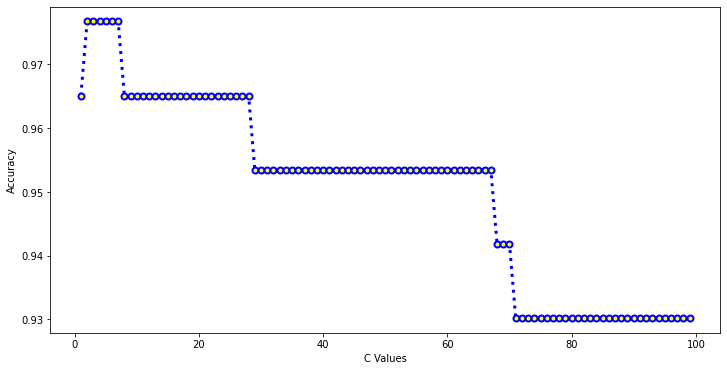

In [74]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100), list_accuracy,
         color="blue",
         linewidth=3,
         linestyle=":",
         marker="o",
         markerfacecolor="yellow",
         markeredgewidth=2, 
         markeredgecolor="blue")
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.show()

In [75]:
list_accuracy2 = []
for i in range(1,101):
  svm = SVC(C=i, random_state = 42)
  svm.fit(x_train,y_train)
  list_accuracy2.append(svm.score(x_test,y_test))
  print(i,list_accuracy2.pop())

1 0.9651162790697675
2 0.9767441860465116
3 0.9767441860465116
4 0.9767441860465116
5 0.9767441860465116
6 0.9767441860465116
7 0.9767441860465116
8 0.9651162790697675
9 0.9651162790697675
10 0.9651162790697675
11 0.9651162790697675
12 0.9651162790697675
13 0.9651162790697675
14 0.9651162790697675
15 0.9651162790697675
16 0.9651162790697675
17 0.9651162790697675
18 0.9651162790697675
19 0.9651162790697675
20 0.9651162790697675
21 0.9651162790697675
22 0.9651162790697675
23 0.9651162790697675
24 0.9651162790697675
25 0.9651162790697675
26 0.9651162790697675
27 0.9651162790697675
28 0.9651162790697675
29 0.9534883720930233
30 0.9534883720930233
31 0.9534883720930233
32 0.9534883720930233
33 0.9534883720930233
34 0.9534883720930233
35 0.9534883720930233
36 0.9534883720930233
37 0.9534883720930233
38 0.9534883720930233
39 0.9534883720930233
40 0.9534883720930233
41 0.9534883720930233
42 0.9534883720930233
43 0.9534883720930233
44 0.9534883720930233
45 0.9534883720930233
46 0.95348837209302

# **Navie Bayes [Gauss]**

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [77]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [78]:
print("navie bayes gaussian accuracy: ",nb.score(x_test,y_test))

navie bayes gaussian accuracy:  0.9534883720930233


# **Navie Bayes [Bernoulli]**

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [80]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [81]:
print("navie bayes bernoulli accuracy : ",nb.score(x_test,y_test))

navie bayes bernoulli accuracy :  0.627906976744186


# **Navie Bayes [Multinomial]**

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [83]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [84]:
print("navie bayes multinomial accuracy : ",nb.score(x_test,y_test))

navie bayes multinomial accuracy :  0.813953488372093
